# homework1-2
- 在中子探测器前加入厚度为1cm的薄塑料闪烁体(两端读出)，当有带电粒子穿过有信号，中子和gamma不产生信号。
 - 假设能量沉积为原带电粒子能量的1/10,时间分辨、能量分辨参数与中子探测器相同。
 
## 要求
- 用1.3的代码生成root文件，读入该root文件。
- 用tree-makeclass的方法，将上述信息加入到代码，并生成新的root文件。
 - 方法1：在源有数据中填加目标信息，本作业使用此方法。
 - 方法2：利用1.3的方法，重新生成目标信息。
- 通过数据分析，验证薄塑料闪烁体可作为带电粒子的veto探测器。
- 保留原ROOT文件的所有参数。将代码上传到github指定目录上，代码以附件方式贴在页面。

## 数据分析
### 打开新生成的treeADC_xi.root文件

In [1]:
TFile * ipf = new TFile("treeADC_xi.root");

In [2]:
TCanvas *c1 = new TCanvas();
c1->Clear();

### TDC分析
- 将多个histogram叠加到一张图上显示的方法，用Draw("same")选项，y轴的大小取决于第一个画出的图。

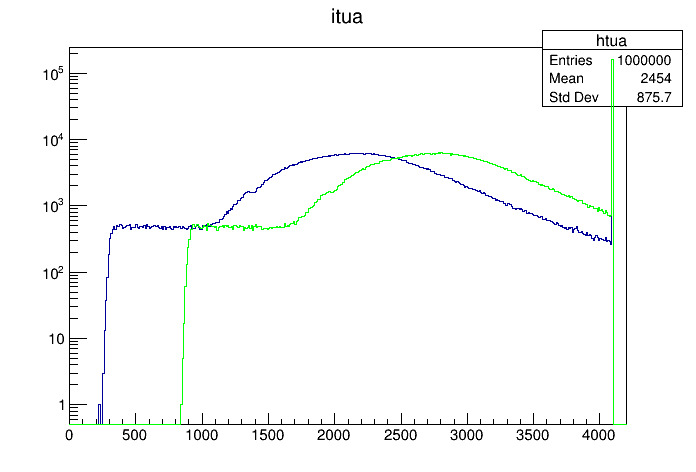

In [3]:
/*
//李老师课程中1.3代码
tree->Draw("itu>>htu(420,0,4200)");
TH1D *htu=(TH1D*)gROOT->FindObject("htu");//得到histogram的指针，通过指针进行进一步操作。
tree->Draw("itd>>htd(420,0,4200)");
TH1D *htd=(TH1D*)gROOT->FindObject("htd");
htd->SetLineColor(kGreen);
htu->Draw();
htd->Draw("same");
c1->SetLogy();
c1->Draw();
*/

tree->Draw("itua>>htua(420,0,4200)");
TH1D *htua=(TH1D*)gROOT->FindObject("htua");//得到histogram的指针，通过指针进行进一步操作。
tree->Draw("itda>>htda(420,0,4200)");
TH1D *htda=(TH1D*)gROOT->FindObject("htda");

htda->SetLineColor(kGreen);
htua->Draw();
htda->Draw("same");

c1->SetLogy();
c1->Draw();


- 将多个histogram叠加到一张图上显示的方法-II，自动调整每张图的y轴显示范围。

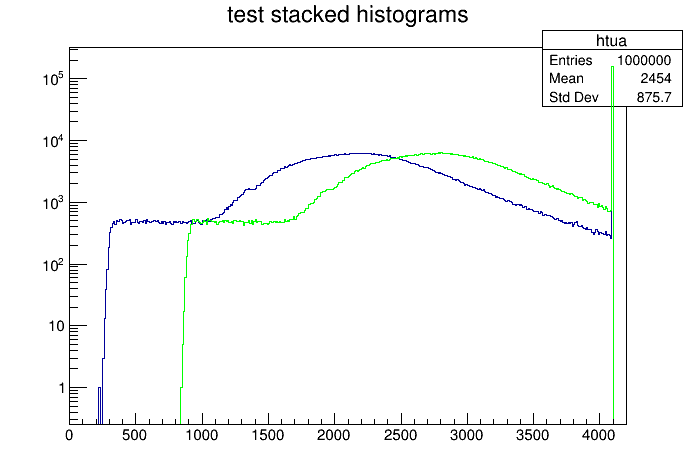

In [4]:
THStack *hs = new THStack("hs","test stacked histograms");
hs->Add(htua);
hs->Add(htda);
hs->Draw("nostack");//替换成hs->Draw();语句，观察效果。
c1->Draw();

- 二维关联图

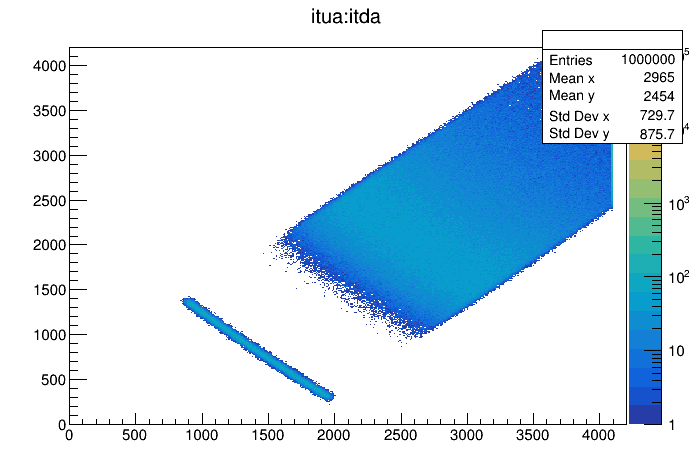

In [5]:
//二维关联图
tree->Draw("itua:itda>>(420,0,4200,420,0,4200)","","colz");//加入pid条件观察图的变化，结合实验设置理解图中不同区域的含义。
gPad->SetLogz();
gPad->SetLogy(0);
c1->Draw();//* 在ROOT环境下可省略

### TDC条件的运用
- 位置分布

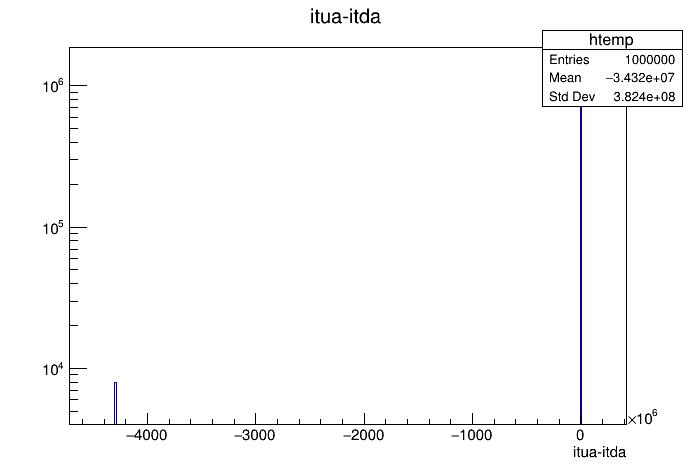

In [6]:
//位置分布
tree->Draw("itua-itda");
gPad->SetLogy();
c1->Draw();

说明：在画图时，特别是需要用到运算时要注意排除超界信号（ch=0，4095，以及pedo）；

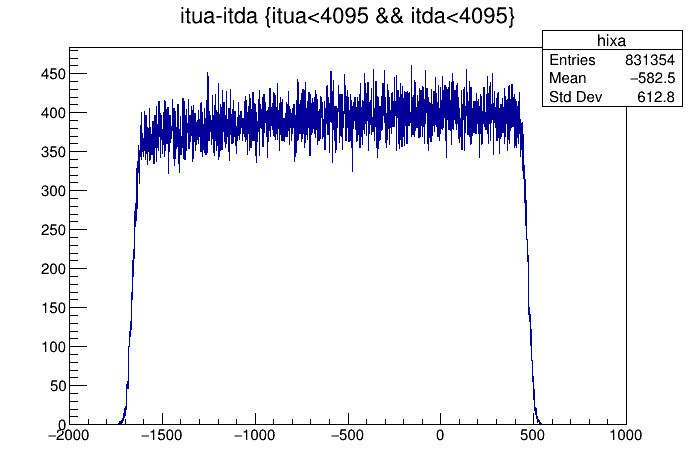

In [7]:
tree->Draw("itua-itda>>hixa(3000,-2000,1000)","itua<4095 && itda<4095");//只有在合理的取值范围的前提下，才能对参数进行运算
gPad->SetLogy(0);
c1->Draw();

### TDC的显示问题

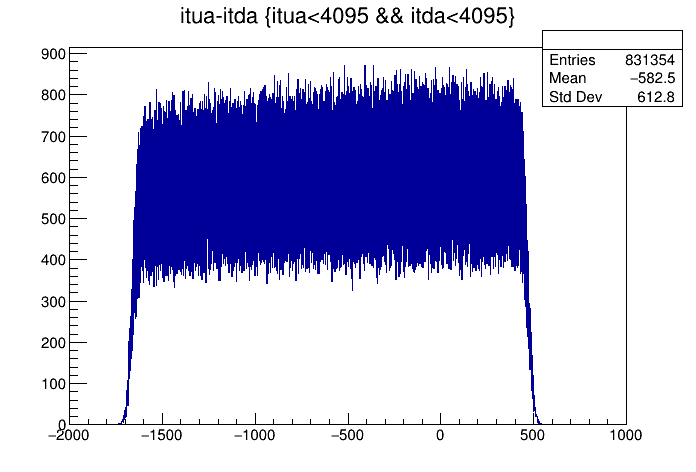

In [8]:
tree->Draw("itua-itda>>(1800,-2000,1000)","itua<4095 && itda<4095");//TDC 道值
gPad->SetLogy(0);
c1->Draw();//显示异常

- 与上图比较，边缘不光滑；

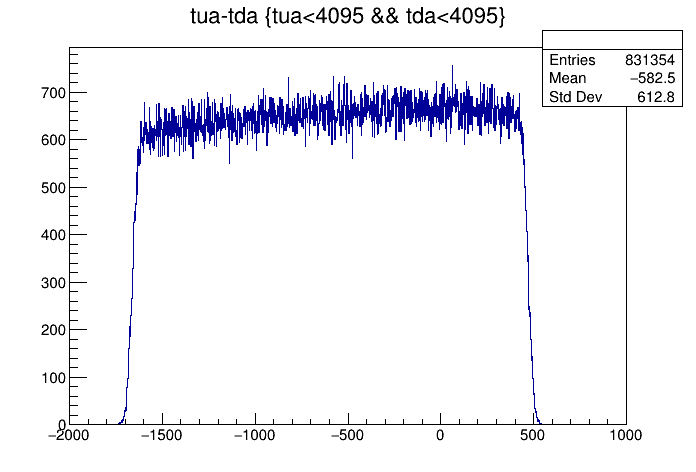

In [9]:
tree->Draw("tua-tda>>(1800,-2000,1000)","tua<4095 && tda<4095");//原始参数
gPad->SetLogy(0);
c1->Draw();

- 与上张图对比，道址和分bin相同，不同的是，上图是取整后的hist，此图是原始的hist；即adc的取整使得画图分bin对图像有影响；

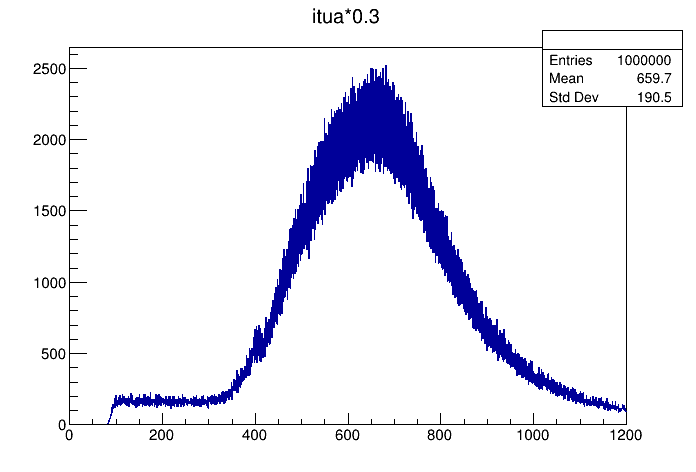

In [10]:
tree->Draw("itua*0.3>>(1200,0,1200)");
c1->Draw();

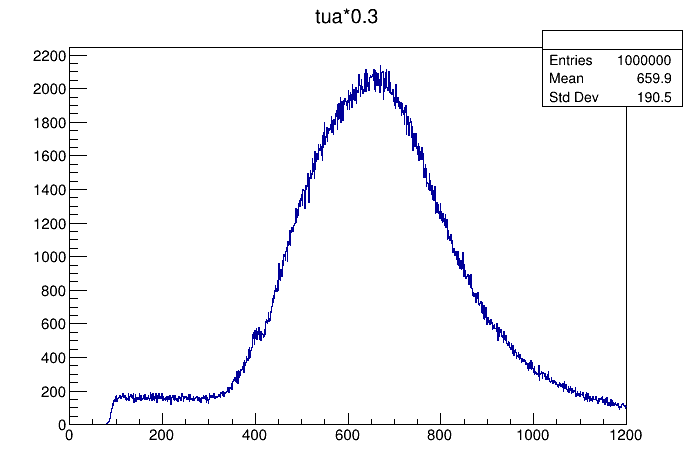

In [11]:
tree->Draw("tua*0.3>>(1200,0,1200)");
c1->Draw();

- 与之前三张图一样，ADC的取整对画图的bin有依赖；

### QDC分析
- 计算pedo峰参数，确定噪声阈值

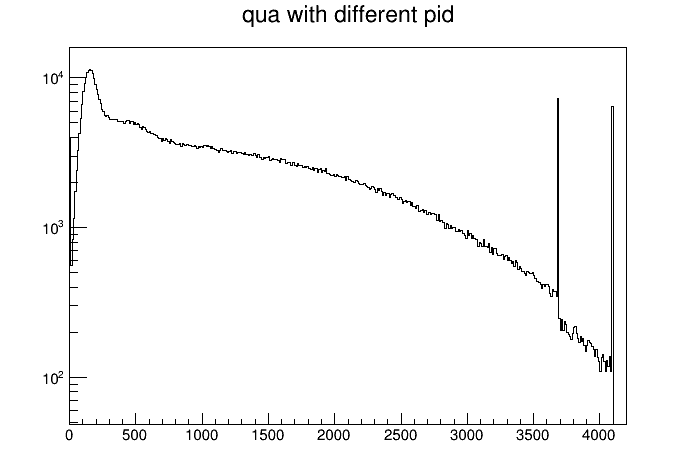

In [12]:
tree->Draw("iqua>>hquaall(420,0,4200)");
TH1D *hquaall=(TH1D*)gROOT->FindObject("hquaall");
hquaall->SetLineColor(kBlack);

tree->Draw("iqua>>hqua1(420,0,4200)","pid==0 || pid==1");
TH1D *hqua1=(TH1D*)gROOT->FindObject("hqua1");
hqua1->SetLineColor(kRed);

tree->Draw("iqua>>hqua2(420,0,4200)","pid==2");
TH1D *hqua2=(TH1D*)gROOT->FindObject("hqua2");
hqua2->SetLineColor(kGreen);


tree->Draw("iqua>>hqua3(420,0,4200)","pid==3");
TH1D *hqua3=(TH1D*)gROOT->FindObject("hqua3");
hqua3->SetLineColor(kBlue);
THStack *hsqua=new THStack("hsqua","qua with different pid");

hsqua->Add(hquaall);
hsqua->Draw("nostack");
gPad->SetLogy();
c1->Draw();

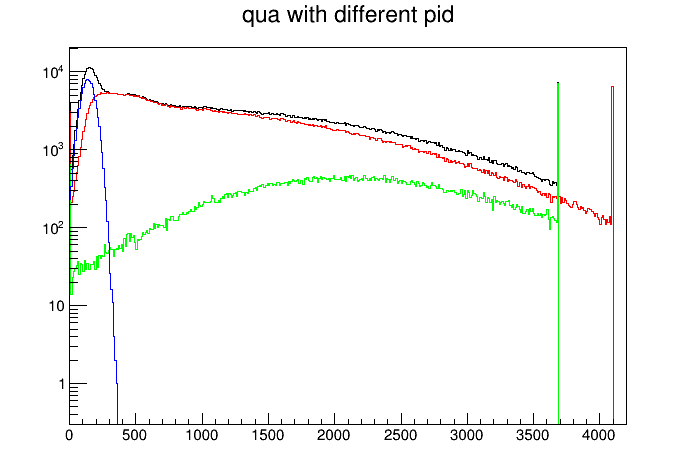

In [13]:
hsqua->Add(hquaall);
hsqua->Add(hqua1);
hsqua->Add(hqua2);
hsqua->Add(hqua3);
hsqua->Draw("nostack");
gPad->SetLogy();
c1->Draw();//辨认pedal峰，超界位置。

- 注意：绿色代表的是带点粒子（质子），由于此时探测器Wall a前方放置了一个wall b作为veto，对于gamma和neutron无影响，而对于带电粒子，wall b会使其损失10%的能量，所以此处qua为原来qu的90%。

In [14]:
tree->Draw("iqda>>hqdaall(420,0,4200)");
TH1D *hqdaall=(TH1D*)gROOT->FindObject("hqdaall");
hqdaall->SetLineColor(kBlack);

tree->Draw("iqda>>hqda1(420,0,4200)","pid==0 || pid==1");
TH1D *hqda1=(TH1D*)gROOT->FindObject("hqda1");
hqda1->SetLineColor(kRed);

tree->Draw("iqda>>hqda2(420,0,4200)","pid==2");
TH1D *hqda2=(TH1D*)gROOT->FindObject("hqda2");
hqda2->SetLineColor(kGreen);


tree->Draw("iqda>>hqda3(420,0,4200)","pid==3");
TH1D *hqda3=(TH1D*)gROOT->FindObject("hqda3");
hqua3->SetLineColor(kBlue);
THStack *hsqda=new THStack("hsqda","qda with different pid");

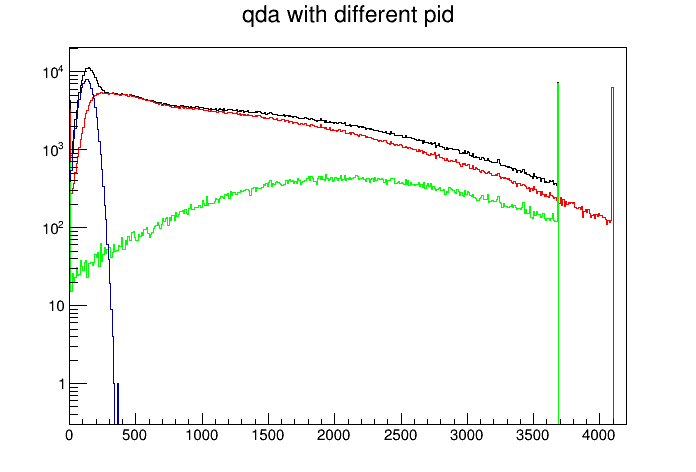

In [15]:
hsqda->Add(hqdaall);
hsqda->Add(hqda1);
hsqda->Add(hqda2);
hsqda->Add(hqda3);
hsqda->Draw("nostack");
gPad->SetLogy();
c1->Draw();//辨认pedal峰，超界位置

### 拟合pedo峰，提取拟合参数

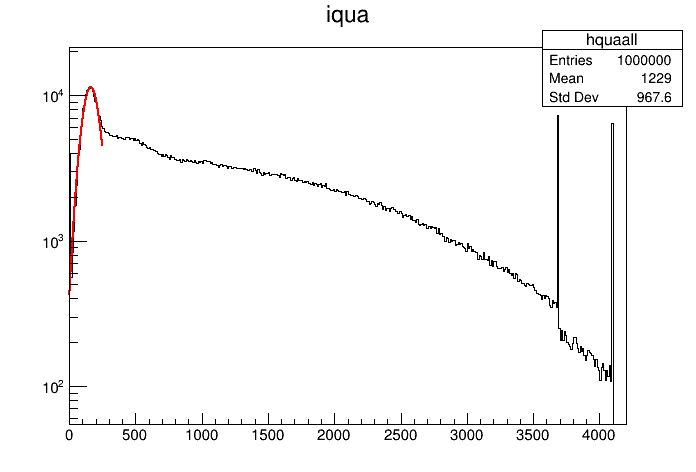

 FCN=4063.34 FROM MIGRAD    STATUS=CONVERGED      80 CALLS          81 TOTAL
                     EDM=4.48334e-09    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     1.13440e+04   3.58624e+01   8.72409e-01   5.53575e-07
   2  Mean         1.63336e+02   2.33848e-01   5.72507e-03  -4.30380e-04
   3  Sigma        6.33371e+01   1.98012e-01   2.23616e-05   1.11732e-01


In [16]:
hquaall->Fit("gaus","","",0,250);
c1->Draw();

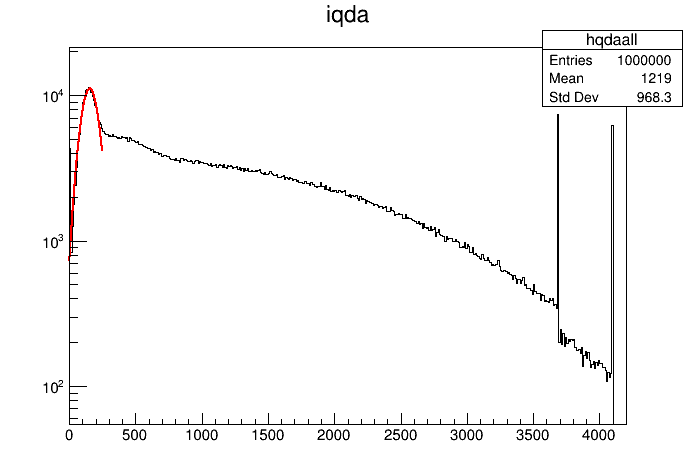

 FCN=4253.6 FROM MIGRAD    STATUS=CONVERGED      72 CALLS          73 TOTAL
                     EDM=4.22475e-09    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     1.11638e+04   3.55380e+01   8.63593e-01  -7.50260e-07
   2  Mean         1.55808e+02   2.33730e-01   6.09827e-03  -3.67774e-04
   3  Sigma        6.63503e+01   2.13583e-01   2.41427e-05   6.98409e-02


In [17]:
hqdaall->Fit("gaus","","",0,250);
c1->Draw();

### 提取拟合结果的方法
- TString ss//声明; ss.Form()//赋值，可为变量; ss.Data()//提取;

In [18]:
TF1 *fgaus[2];
Double_t ped[2],sigma[2];//u,d
TString sqa[2]={"qua","qda"};

In [19]:
fgaus[0]=hquaall->GetFunction("gaus");//得到拟合函数的指针
fgaus[1]=hqdaall->GetFunction("gaus");
for(int i=0;i<2;i++) {
    ped[i]=fgaus[i]->GetParameter(1);//得到拟合函数的第二个参数
    sigma[i]=fgaus[i]->GetParameter(2);
    //TString的格式化输出。用法与printf一致。
    TString ss;
    ss.Form("ped_%s=%.2f, sigma_%s=%.2f",sqa[i].Data(),ped[i],sqa[i].Data(),sigma[i]); 
    cout<<ss<<endl;
}

ped_qua=163.34, sigma_qua=63.34
ped_qda=155.81, sigma_qda=66.35


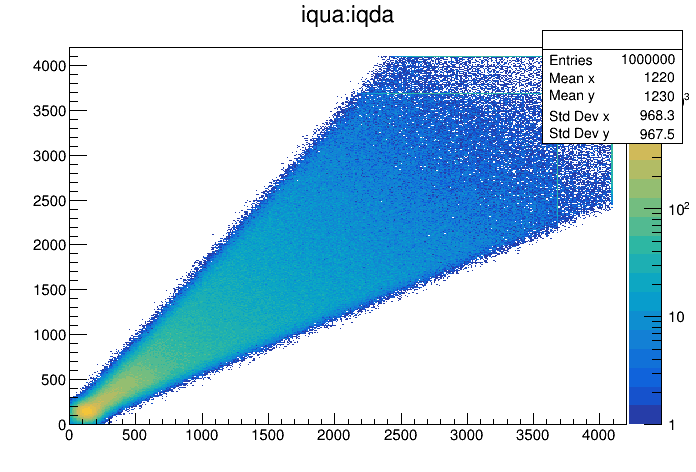

In [20]:
tree->Draw("iqua:iqda>>(420,0,4200,420,0,4200)","","colz");
c1->SetLogz();
c1->SetLogy(0);
c1->Draw();//* 在ROOT环境下可省略

### 在tree的Draw("")内不能直接输入临时定义的动态数据哦！！！

### ROOT命令的“”内加入动态数据的方法- TString::Form()

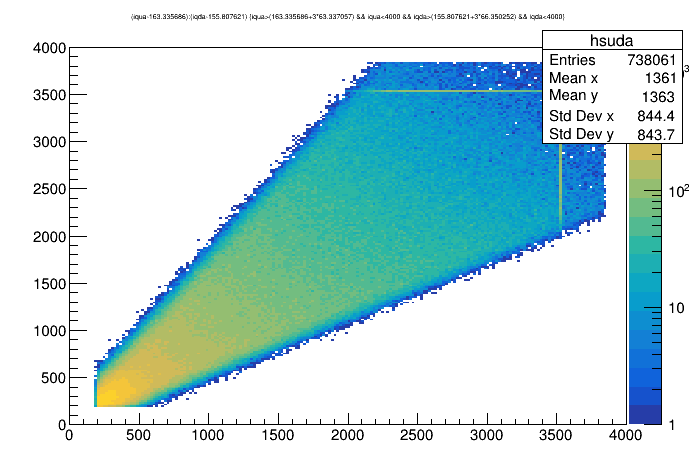

tree: (iqua-163.335686):(iqda-155.807621)>>hsuda(200,0,4000,200,0,4000)
cut: iqua>(163.335686+3*63.337057) && iqua<4000 && iqda>(155.807621+3*66.350252) && iqda<4000


In [21]:
//qua,qda减去ped，去掉噪声及超界值，选择合理的取值范围
TString stree,scut;
stree.Form("(iqua-%f):(iqda-%f)>>hsuda(200,0,4000,200,0,4000)",ped[0],ped[1]);//在""内加入动态数据的方法
scut.Form("iqua>(%f+3*%f) && iqua<4000 && iqda>(%f+3*%f) && iqda<4000",ped[0],sigma[0],ped[1],sigma[1]);
tree->Draw(stree.Data(),scut.Data(),"colz");
c1->Draw();
cout<<"tree: "<<stree.Data()<<endl;
cout<<"cut: "<<scut.Data()<<endl;

### 设置参数的别名：tree->SetAlias()

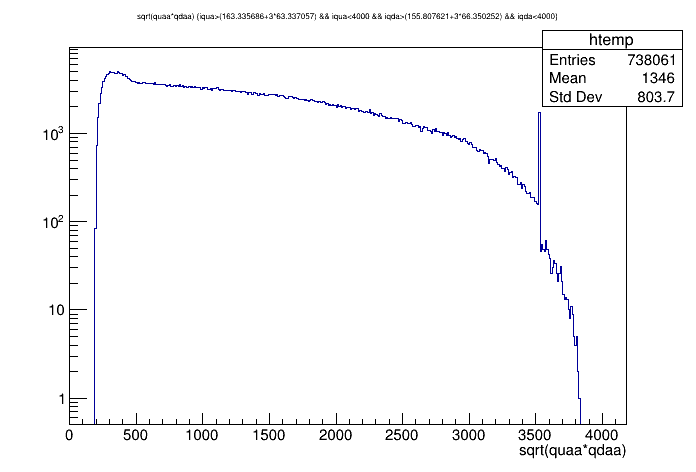

In [22]:
TString squaa,sqdaa;
squaa.Form("iqua-%f",ped[0]);
sqdaa.Form("iqda-%f",ped[1]);
tree->SetAlias("quaa",squaa.Data());
tree->SetAlias("qdaa",sqdaa.Data());
TCut cpid="pid=2";
tree->Draw("sqrt(quaa*qdaa)",scut.Data());
gPad->SetLogy();
c1->Draw();

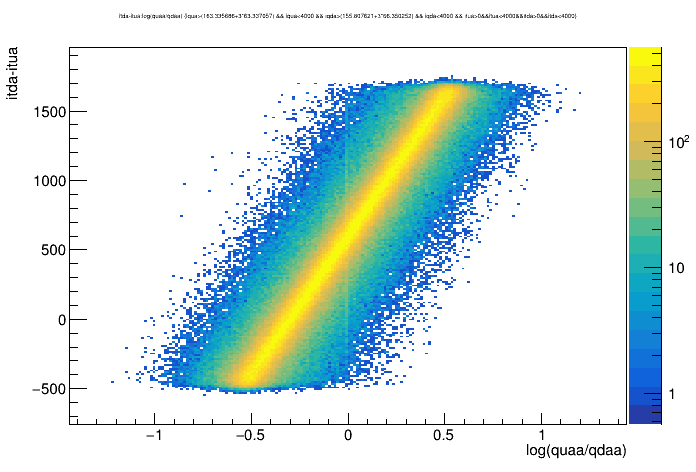

In [23]:
TString stcut="itua>0&&itua<4000&&itda>0&&itda<4000";
scut=scut+" && "+stcut;//加入时间cut
tree->Draw("itda-itua:log(quaa/qdaa)",scut.Data(),"colz");
c1->SetLogz();
c1->SetLogy(0);
c1->Draw();

### 除去了pedo（pedo_mean+3*pedo_sigma）同时卡了时间

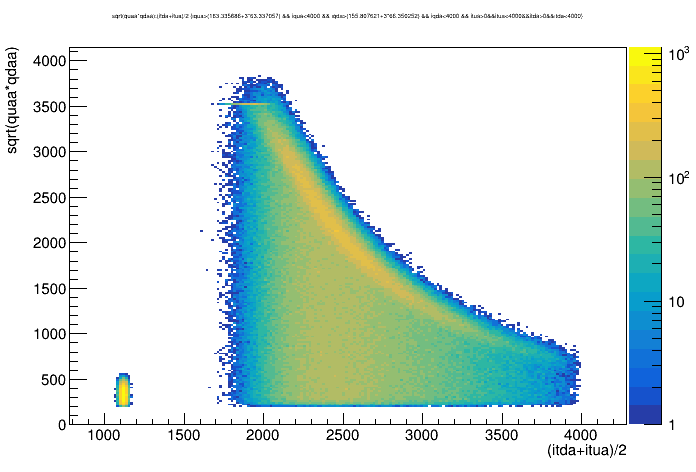

In [24]:
tree->Draw("sqrt(quaa*qdaa):(itda+itua)/2",scut.Data(),"colz");
c1->SetLogz();
c1->SetLogy(0);
c1->Draw();

### 检验wall b作为veto的作用

#### wall a得到的Q vs TOF

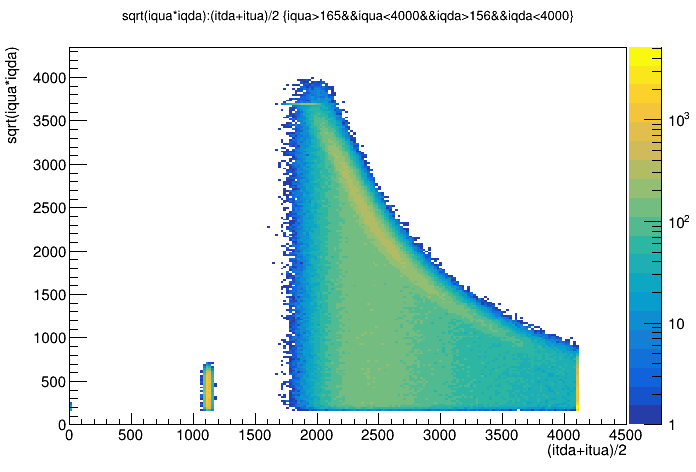

In [25]:
tree->Draw("sqrt(iqua*iqda):(itda+itua)/2","iqua>165&&iqua<4000&&iqda>156&&iqda<4000","colz");
c1->SetLogz();
c1->SetLogy(0);
c1->Draw();

#### wall b得到的Q vs TOF

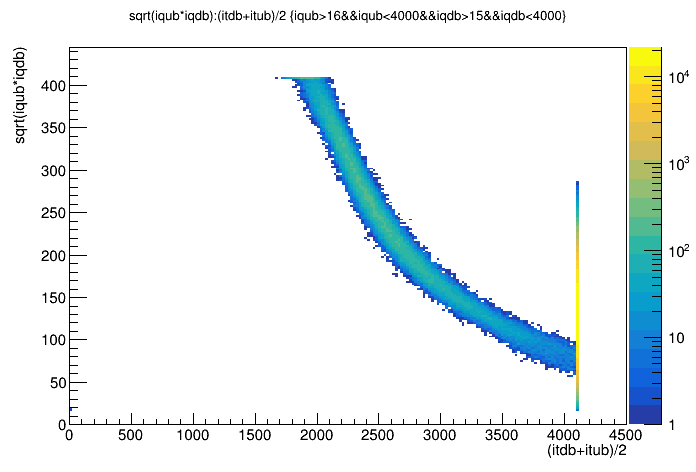

In [26]:
tree->Draw("sqrt(iqub*iqdb):(itdb+itub)/2","iqub>16&&iqub<4000&&iqdb>15&&iqdb<4000","colz");
c1->SetLogz();
c1->SetLogy(0);
c1->Draw();

### wall b得到的Q vs TOF作为veto

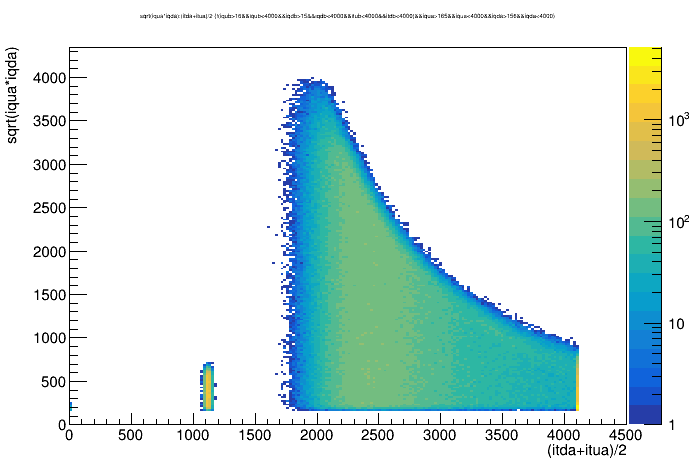

In [27]:
TString cutb = "!(iqub>16&&iqub<4000&&iqdb>15&&iqdb<4000&&itub<4000&&itdb<4000)";//加入时间条件；
TString cuta = "iqua>165&&iqua<4000&&iqda>156&&iqda<4000";
cutb = cutb+"&&"+cuta;
tree->Draw("sqrt(iqua*iqda):(itda+itua)/2",cutb.Data(),"colz");
c1->SetLogz();
c1->SetLogy(0);
c1->Draw();

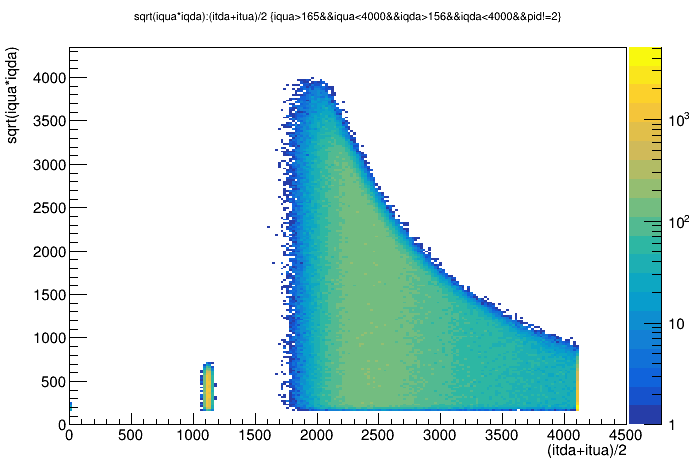

In [28]:
tree->Draw("sqrt(iqua*iqda):(itda+itua)/2","iqua>165&&iqua<4000&&iqda>156&&iqda<4000&&pid!=2","colz");
c1->SetLogz();
c1->SetLogy(0);
c1->Draw();

- 上两图对比：一个是以wall b作为veto，一个是直接画出pid==0&&pid==1，两图分布基本相似，可以认定wall b的veto是有效的；

In [29]:
ipf->Close();

In [30]:
!jupyter nbconvert homework1-2 --to html

[NbConvertApp] Converting notebook homework1-2.ipynb to html


